# Import Basic Libraries & Data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Deep_Learning_Practise/advertising.csv")

# Data Preprocessing

In [ ]:
# to show first five records
df.head()

NameError: ignored

In [ ]:
# To remove unwanted columns

df.drop("Unnamed: 0",axis=1,inplace=True)

NameError: ignored

In [ ]:
# To check unwanted columns droped or not 
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# To check null values by Visulization
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()
print(df.isnull().sum())

NameError: ignored

# Seperate input & output from dataset





In [ ]:
x=df.drop("sales",axis=1)
y=df["sales"]

# Train_test_split data (80%-Training & 20% Testing)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling input data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler() # create an object
x_train=ss.fit_transform(x_train)# training data
x_test=ss.transform(x_test) # testing data

# Create Neaural Network

In [ ]:
import tensorflow as tf

In [ ]:
# Create Sequential Model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(2,activation="relu",input_shape=(x.shape[1],)),
                           tf.keras.layers.Dense(3,activation="relu"),
                           tf.keras.layers.Dense(1)
])

In [ ]:
# Compile the model
model.compile(optimizer="sgd",loss="mse")

In [ ]:
# Train the model by using inbuild method fit
trained_model=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 4ms/step - loss: 131.8184
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 12.9896
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 3.6934
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 3.0100
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 2.7196
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 2.3599
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 2.4692
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.9317
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 2.8694
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 2.1372
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 2.0303
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 2.0716
Epoch 13/50
5/5 [==============================] - 0s 3ms/step - loss:

# Visualized the history of loss of trained_model

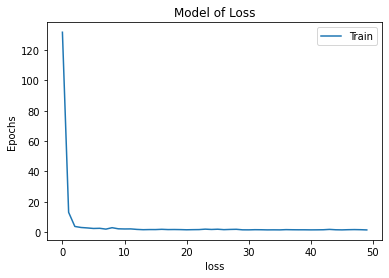

In [ ]:
plt.plot(trained_model.history['loss'])
#plt.plot(trained_model.history["val_loss"])
plt.title("Model of Loss")
plt.xlabel("loss")
plt.ylabel("Epochs")
plt.legend(["Train","Val"],loc="upper right")
plt.show()

# Testing the model

In [ ]:
y_pred=model.predict(x_test)
print(y_pred[0:5])

[[ 9.520247]
 [ 8.281201]
 [ 8.518491]
 [25.354927]
 [11.31356 ]]


In [ ]:
print(y_test[0:5])

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
Name: sales, dtype: float64


# Evaluation_matrix

In [ ]:
# Find the r2_score
from sklearn.metrics import r2_score

In [ ]:
score=(r2_score(y_test,y_pred))
print(score.mean()*100)

90.56490564381761
